## EE 242 Lab 3a – Frequency Domain Representation of Signals - Fourier Series

Ewan, Sean, Tyson

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [69]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.io.wavfile as sp
import IPython
# import whatever other modules you use in this lab -- there are more that you need than we've included 
# the


## Summary

In this lab, we will learn how to build periodic signals from component sinusoids and how to transform signals from the time domain to the frequency domain. The concepts we’ll focus on include: implementation of the Fourier Series synthesis equation, using a discrete implementation of the Fourier Transform (DFT) with a digitized signal, and understanding the relationship between the discrete DFT index k and frequency
ω for both the original continuous signal x(t). This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 3a turn in checklist

•	Lab 3a Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)




## Assignment 1 -- Generating simple periodic signals

In the first assignment, you will develop an understanding of how some periodic signals are easier to approximate than others with a truncated Fourier Series. In this lab, we’ll work with real signals and use the synthesis equation:

$$x(t)=a_0+\sum_{k=1}^N2|a_k|cos(k\omega_0t+\angle a_k)$$

In lecture, you saw that you get ripples at transition points in approximating a square wave (Gibbs phenomenon). This happens for any signals with sharp edges. This assignment will involve approximating two signals (a sawtooth and a triangle wave) that have the same fundamental frequency (20Hz).

**A.** Write a function for generating a real-valued periodic time signal given the Fourier series coefficients [$a_0~a_1~···~a_N$], the sampling frequency, and the fundamental frequency. You may choose to have complex input coefficients or have separate magnitude and phase vectors for describing $a_k$.

**B.**  Define variables for the sampling frequency (8kHz) and the fundamental frequency (20Hz). Using this sampling frequency, create a time vector for a length of 200ms.

**C.**  The sawtooth signal has coefficients as follows:
$$a_0=0.5,a_k=1/(j2k\pi) $$
Using the function from part A, create three approximations of this signal with N = 2,5,20 and plot together in a 3×1 comparison.

**D.**  A triangle signal has coefficients:
$$a_0=0.5,a_k=\frac{2sin(k\pi/2)}{j(k\pi)^2}e^{-j2k\pi/2} $$
Create three approximations of this signal with N = 2,5,20 and plot together in a 3×1 comparison.


<IPython.core.display.Javascript object>


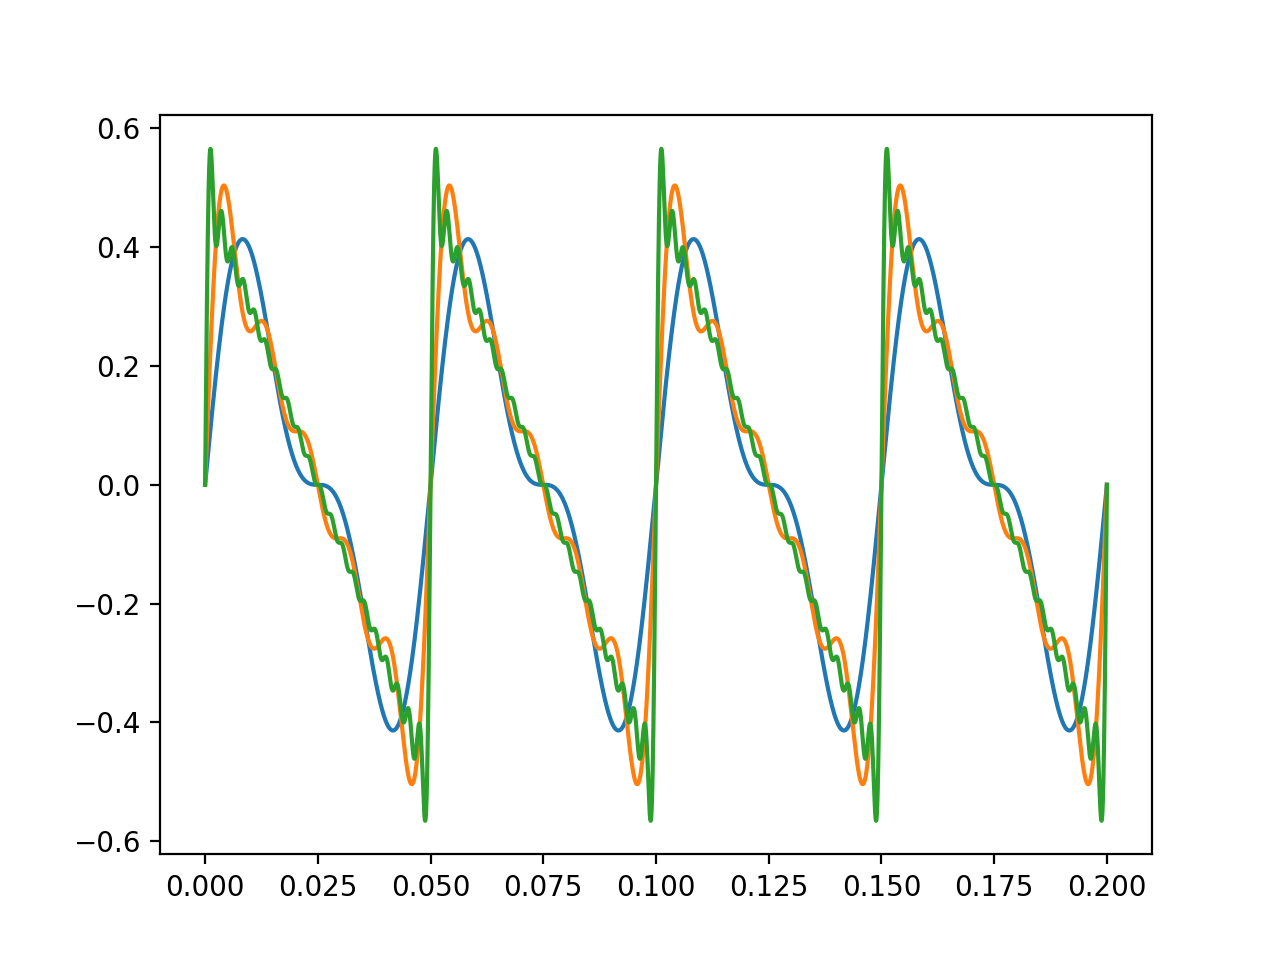

<IPython.core.display.Javascript object>


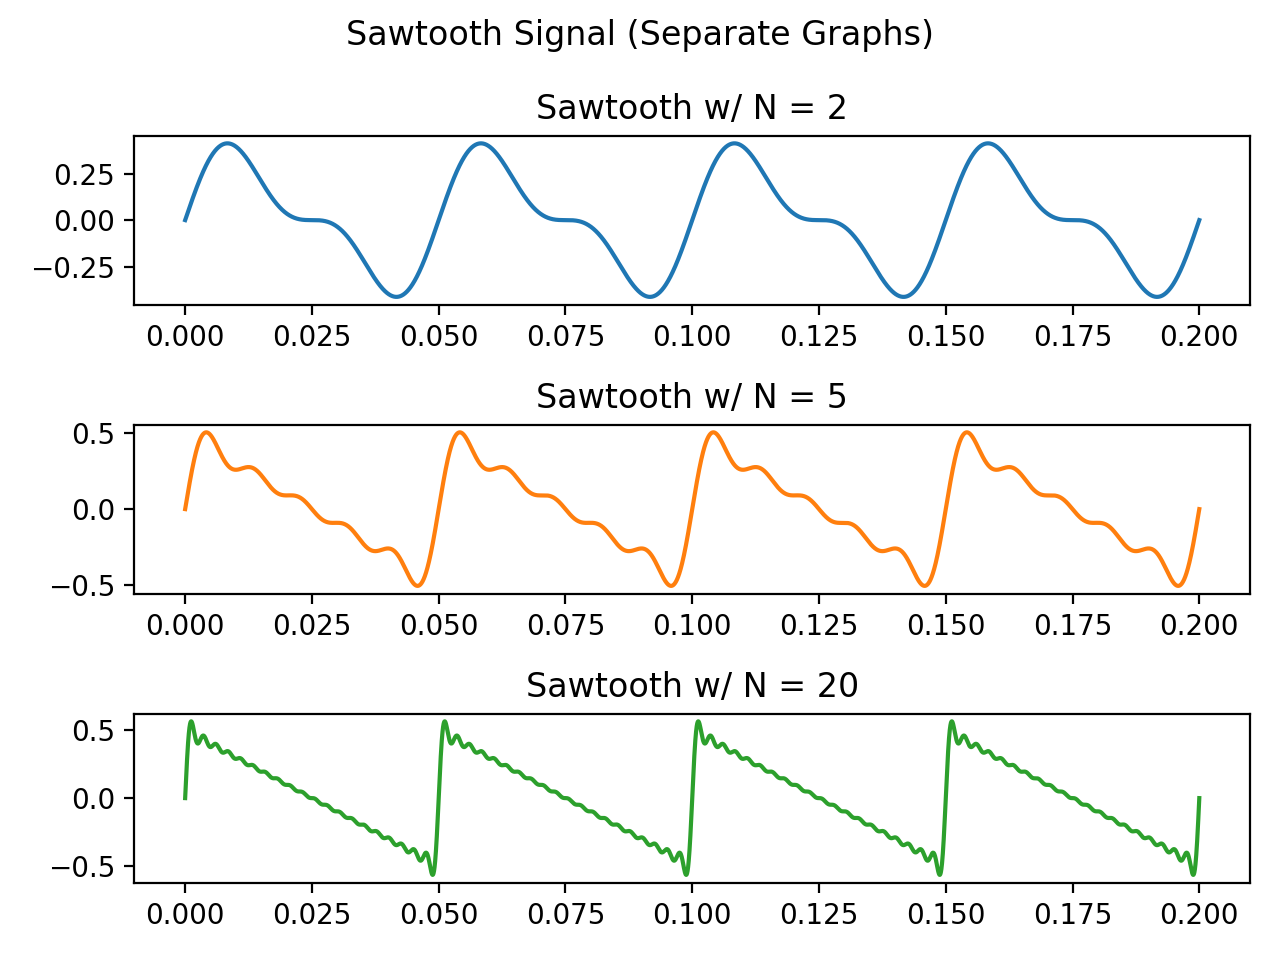

<IPython.core.display.Javascript object>


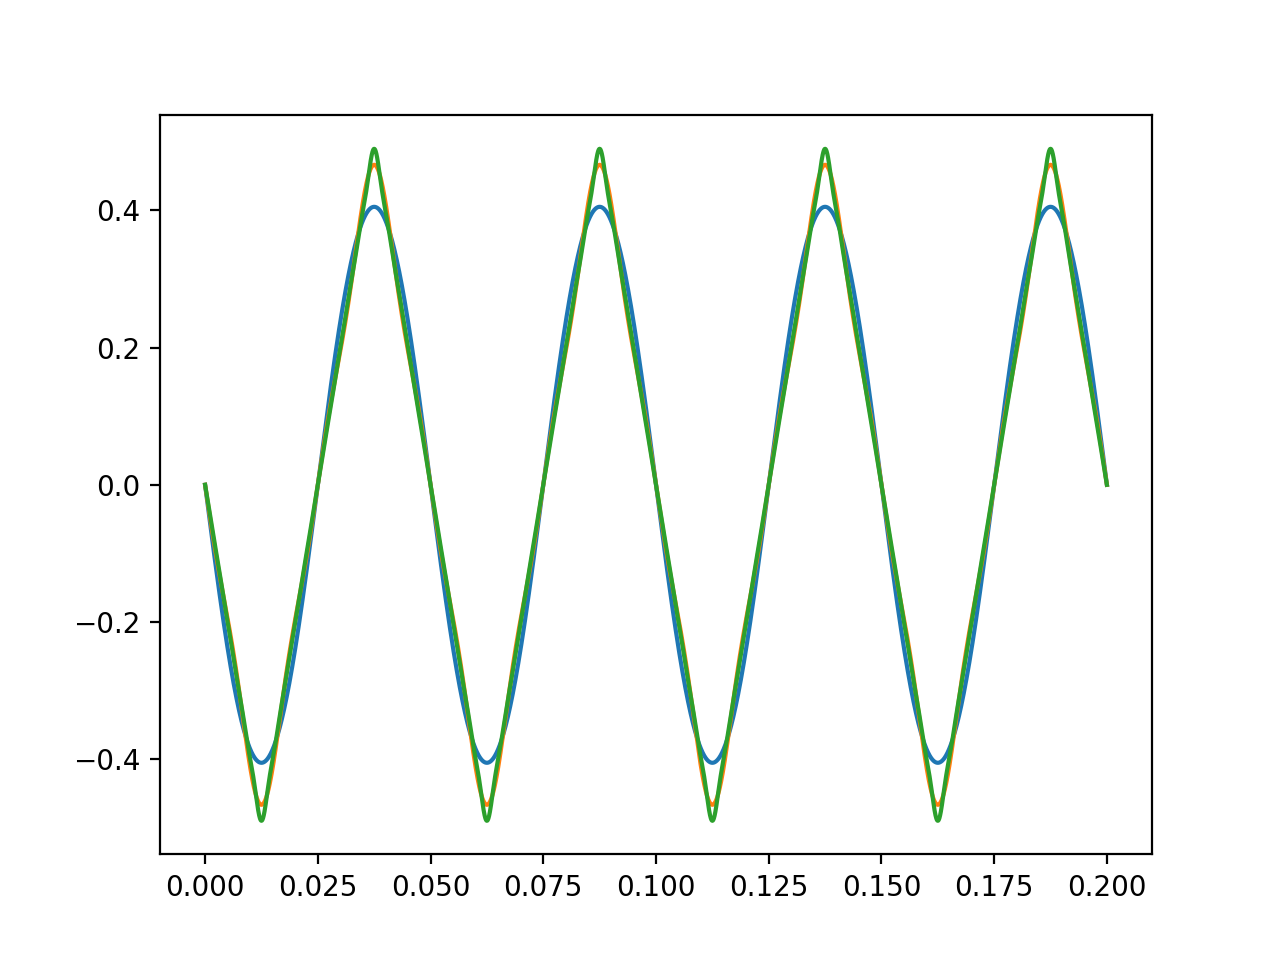

<IPython.core.display.Javascript object>


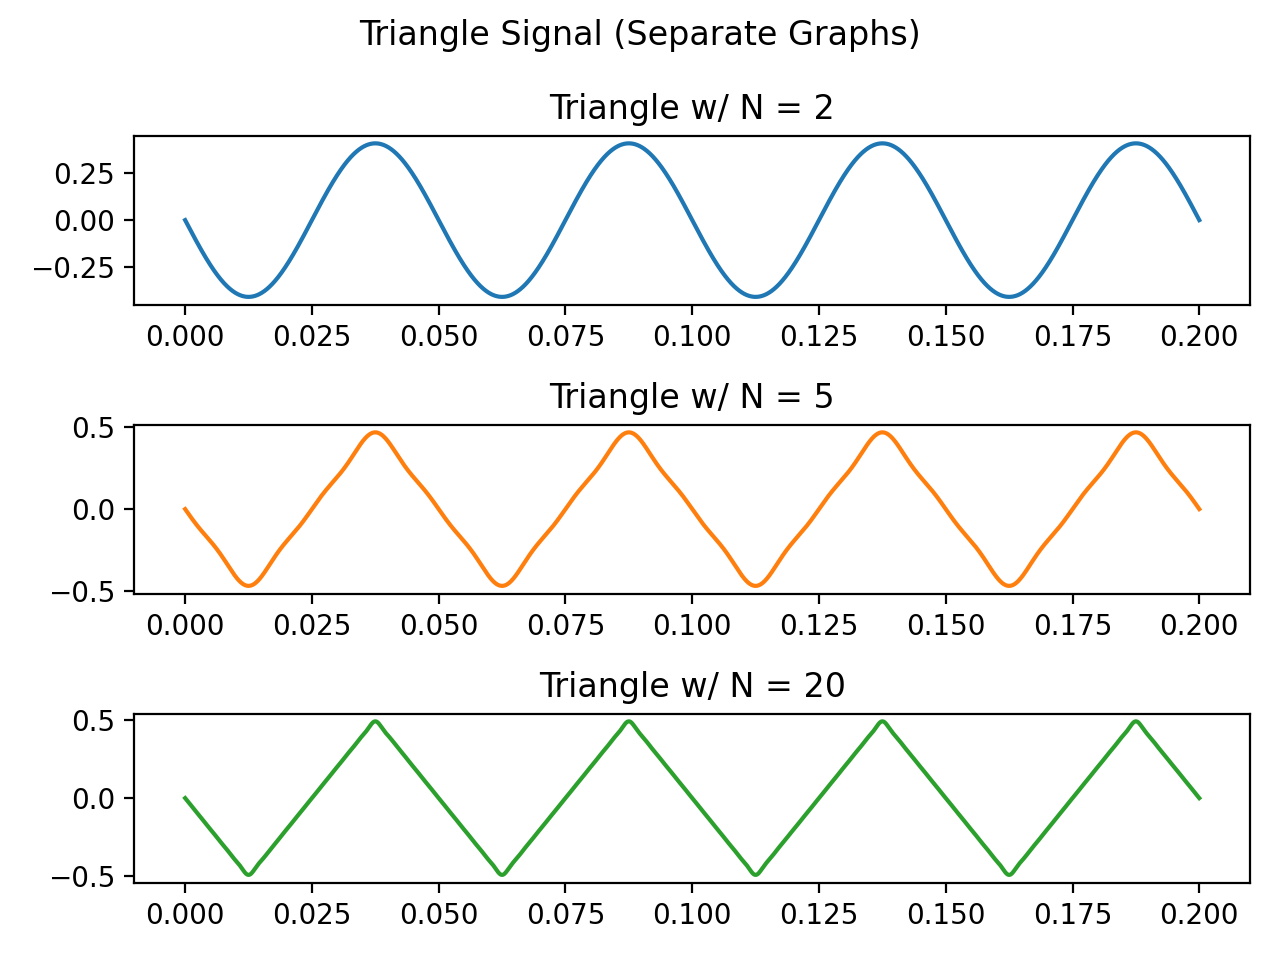

Text(0.5, 1.0, 'Triangle w/ N = 20')

In [70]:
# Assignment 1 - Generating Periodic Signals

# Part A and Part B
# Fourier Function with the following coefficients/inputs 

def Fourier(a, n): 

#  Part B's defining variables where fs = 8 kHz, f0 = 20Hz with 200ms
        x = np.zeros(8000)
        T = np.linspace(0, 0.2, 8000)
        
        for i in range(0, n + 1):
            mag = np.absolute(a[i])
            a_k = np.angle(a[i])
            x_t = 2 * mag * np.cos(i * 20 * 2 * np.pi * T + a_k) # Synthesis Equation from above
            x += x_t
        return (T, x)
    
# additional function for part 2

def Fourier_2(a, time, f0, fs): 

#  Part B's defining variables where fs = 8 kHz, f0 = 20Hz with 200ms
        x = np.zeros(int(time*fs))
        T = np.linspace(0, time, int(time*fs))
        
        for i in range(0, len(a[0])):
            mag = a[0][i]
            a_k = a[1][i]
            x_t = 2 * mag * np.cos(i * f0 * 2 * np.pi * T + a_k) # Synthesis Equation from above
            x += x_t
        return (T, x)

# Defining sawtooth and triangle signals with size at 21 and accepts complex values
saw = np.zeros(21, complex)
tri = np.zeros(21, complex)

for i in range(1, 21):
    saw[i] = complex(0, -0.5/(i * np.pi))
           
# Part C
# Plotting the Sawtooth signal using Fourier function with three approx. signals with N at 2, 5, 20
T1, ax1 = Fourier(saw, 2)
T2, ax2 = Fourier(saw, 5)
T3, ax3 = Fourier(saw, 20)

# Figure with all three signals combined
plt.figure("Sawtooth Signal (Combined)")
plt.plot(T1, ax1)
plt.plot(T2, ax2)
plt.plot(T3, ax3)

# Figure with all three signals but separate in subplots
fig, axs = plt.subplots(3)
fig.set_tight_layout(True)
fig.suptitle('Sawtooth Signal (Separate Graphs)')

axs[0].plot(T1, ax1, 'tab:blue')
axs[0].set_title('Sawtooth w/ N = 2')

axs[1].plot(T2, ax2, 'tab:orange')
axs[1].set_title('Sawtooth w/ N = 5')

axs[2].plot(T3, ax3, 'tab:green')
axs[2].set_title('Sawtooth w/ N = 20')

# Part D
# Defining triangle's formula phase shift as its own function
def phase_shift(x): 
    shift = complex(np.cos(x), np.sin(x))
    return shift

# Defining triangle's formula for a_k as numerator (n) and denominator (d) through a for loop
for i in range(1, 21):
    n = 2 * np.sin((i * np.pi) / 2)
    d = complex(0, -1 / (i * np.pi) ** 2)
    shift = phase_shift(-i * np.pi)
    tri[i] = n * d * shift
                  
# Plotting the Triangle signal using Fourier function with three approx. signals with N at 2, 5, 20
T4, ax4 = Fourier(tri, 2)
T5, ax5 = Fourier(tri, 5)
T6, ax6 = Fourier(tri, 20)

# Figure with all three signals combined
plt.figure("Triangle Signal (Combined)")
plt.plot(T4, ax4)
plt.plot(T5, ax5)
plt.plot(T6, ax6)

# Figure with all three signals but separate in subplots
fig, axs = plt.subplots(3)
fig.set_tight_layout(True)
fig.suptitle('Triangle Signal (Separate Graphs)')

axs[0].plot(T4, ax4, 'tab:blue')
axs[0].set_title('Triangle w/ N = 2')

axs[1].plot(T5, ax5, 'tab:orange')
axs[1].set_title('Triangle w/ N = 5')

axs[2].plot(T6, ax6, 'tab:green')
axs[2].set_title('Triangle w/ N = 20')


###  Discussion

You should have noticed that the second signal converges more quickly. Discuss the two reasons for this.

One reason that the signal converges more quickly is that the triangle signal is composed only of lines of inverse slope, whereas in a sawtooth signal, the slopes used to compose a sawtooth wave are alternating both in sign and in magnitude. Sin and cosin functions are much more like the former, where half of a period of each function is equivalent to the second half flipped over the y axis. Thus you only need one trig function to create an alternating slope figure, whereas you would need twice as many to create one with slopes alternating in sign and magnitude. The second reason is that you do not need waves with opposite sign to make sure the signal remains scaled properly.

## Assignment 2 -- Synthesizing a musical note

In this assignment, you will use the same synthesis equations to try to approximate a single note from a horn, which has the frequency characteristics illustrated below. Download the file horn11short.wav from the assignment page to compare your synthesized version to the original.

Figure below shows the frequency component of a note played by a horn.
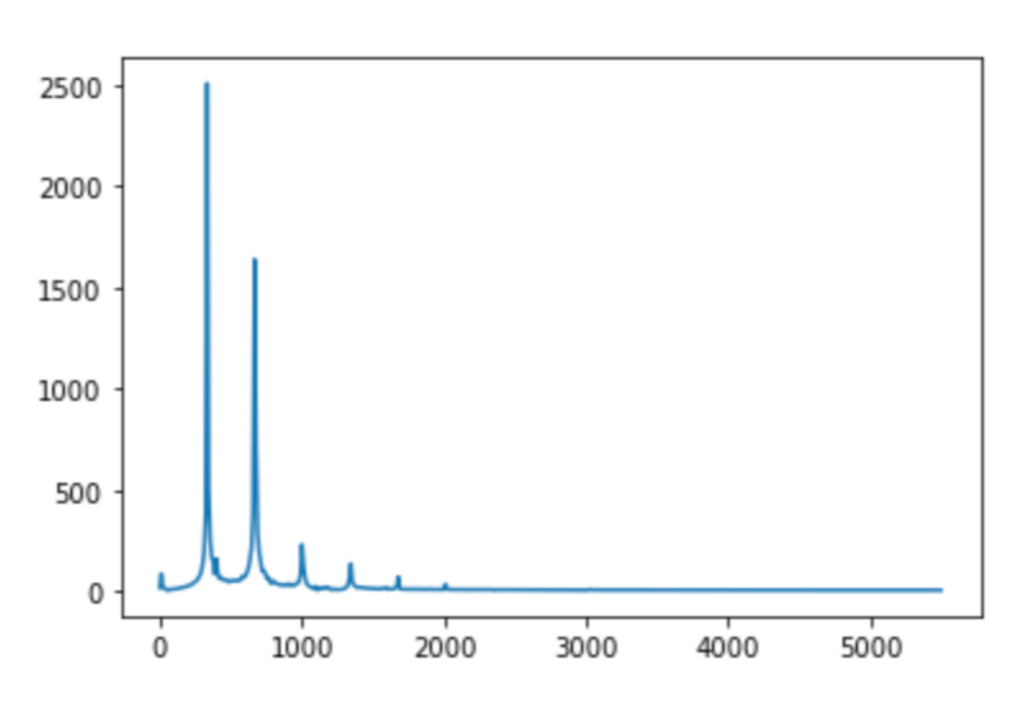

**A.**  Read in the horn signal, and use the sampling rate $f_s$ that you read in to create a time vector of length 100ms. Define the fundamental frequency to be $f_0$ = 335Hz. Create a signal that is a sinusoid at that frequency, and save it as a wav file.

**B.**  Create a vector (or two) to characterize $a_k$ using:

$$|a_k|:[2688,1900,316,178,78,38]$$

$$\angle a_k:[-1.73,-1.45,2.36,2.30,-2.30,1.13]$$

assuming $a_0=0$ and the first element of the vectors correspond to $a_1$. Use the function you created in part 1 to synthesize a signal, with $f_s$ and $f_0$ above, and save it as a wav file.

**C.**  Plot the 100ms section of the original file starting at 200ms with a plot of the synthesized signal in a 2×1 plot.

**D.** Play the original file, the single tone, and the 6-tone approximation in series.



In [71]:
# Assignment 2 - Synthesizing a musical note

# A. Read in the horn signal, and use the sampling rate
# 𝑓𝑠  that you read in to create a time vector of length 100ms. 
# Define the fundamental frequency to be  𝑓0  = 335Hz. Create a 
# signal that is a sinusoid at that frequency, and save it as a wav file.

def generate_sine(t_duration, f0, fs):
    
    # YOUR CODE HERE
    # Generating x axis with samples every fs
    # that is t_duration long
    t_arr = np.linspace(0, time, int(time*fs))
    amplitudes = np.sin(np.pi * f0 * t_arr) # generate sin wave with 2pi * fs angular frequency

    # Return 1D numpy arrays each containing timepoints and sine waveform amplitudes
    return t_arr, amplitudes 

# reading in horn signal
h_tr, h_orig = sp.read("horn11short.wav")

print(h_tr)
# initializing parameters for signal generation
h_size = h_orig.size
length = 0.1
f0 = 335
f0_rad = 335 * 2 * np.pi

# creating time vector for sin wave
time = np.arange(0, h_orig.size)

# there should be 
time_sin = np.linspace(0, int(length * h_tr), int(length * h_tr))

print(time_sin)
sin_sig = generate_sine(length, f0_rad * time_sin) * 5000
#sin_sig = generate_sine(length, f0, h_tr)

plt.plot(time_sin, sin_sig)
print(sin_sig)
sp.write('sin.wav', h_tr, sin_sig.astype('int16'))

# B. Create a vector (or two) to characterize  𝑎𝑘  using:
# Use the function you created in part 1 to synthesize a 
# signal, with  𝑓𝑠  and  𝑓0  above, and save it as a wav file.

a_mag = [0, 2688,1900,316,178,78,38]
a_phase = [0, -1.73, -1.45, 2.36, 2.30, -2.30, 1.13]

mag_and_phase = [a_mag, a_phase]

print(mag_and_phase)
# function above used a single list of coefficients, this function is reinstantiated to accept two lists
sin_time, sin_wave_2 = Fourier_2(mag_and_phase, length, f0, h_tr)

sin_wave_2 = sin_wave_2 
plt.plot(sin_time, sin_wave_2)

# setting up subsection of horn for plotting
h_plot = h_orig[int(h_tr * 0.2): int(h_tr * 0.3)]
t_plot = np.arange(0, h_tr * 0.3 - h_tr * 0.2 - 1)
print(t_plot)
print(h_plot.size)

print(sin_wave_2)
fig, axs = plt.subplots(2)
fig.set_tight_layout(True)
fig.suptitle('Horn vs Composite Wave')

axs[0].plot(t_plot, h_plot, 'tab:blue')
axs[0].set_title('Horn')

axs[1].plot(sin_time, sin_wave_2, 'tab:orange')
axs[1].set_title('Composite Wave')

sp.write('sin_wave_2.wav', h_tr, sin_wave_2.astype('int16'))


IPython.display.display(IPython.display.Audio("horn11short.wav"))

IPython.display.display(IPython.display.Audio("sin.wav"))

IPython.display.display(IPython.display.Audio("sin_wave_2.wav"))


11025
[0.00000000e+00 1.00090827e+00 2.00181653e+00 ... 1.09999818e+03
 1.10099909e+03 1.10200000e+03]


TypeError: only size-1 arrays can be converted to Python scalars

###  Discussion

The approximation does not sound quite like the original signal and the plot should
look pretty different. The difference in sound is in part due to multiple factors, including the truncated approximation, imperfect estimate of the parameters, and the fact that the original signal is not perfectly periodic. Try adjusting some parameters and determine what you think is the main source of distortion.

Ok. The main source of distortion relates to the fact that our generated signal does not have the same noise and variation in amplitude that the horn signal has, and also does not contain as many harmonics.